In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 23.6 MB/s eta 0:00:00


In [4]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.12.0.88

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 14.3 MB/s eta 0:00:00


In [1]:
from easyocr import Reader
import cv2
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import numpy as np

In [2]:
languages_list = ['en', 'pt']
print(languages_list)

['en', 'pt']


In [3]:
gpu = True

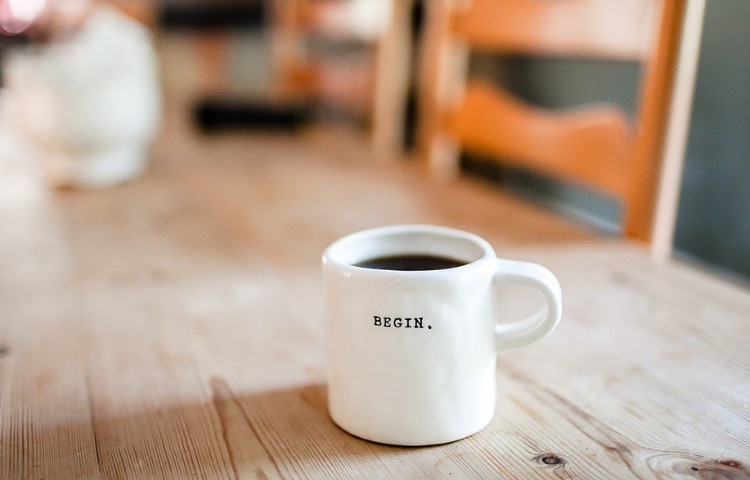

In [4]:
img = cv2.imread('/content/cup.jpg')
cv2_imshow(img)

In [5]:
original = img.copy()

In [6]:
reader = Reader(languages_list, gpu)
results = reader.readtext(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [7]:
results

[([[np.int32(373), np.int32(313)],
   [np.int32(435), np.int32(313)],
   [np.int32(435), np.int32(331)],
   [np.int32(373), np.int32(331)]],
  'BEGIN .',
  np.float64(0.6015328013699431))]

In [8]:
font = '/content/calibri.ttf'

In [9]:
def write_text(text, x, y, img, font, color=(50,50,255), font_size=22):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font, fill = color)
  img = np.array(img_pil)
  return img

In [10]:
def box_coordinates(box):
  (lt, rt, br, bl) = box
  lt = (int(lt[0]), int(lt[1]))
  rt = (int(rt[0]), int(rt[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  return lt, rt, br, bl

In [11]:
results[0][0]

[[np.int32(373), np.int32(313)],
 [np.int32(435), np.int32(313)],
 [np.int32(435), np.int32(331)],
 [np.int32(373), np.int32(331)]]

In [12]:
box_coordinates(results[0][0])

((373, 313), (435, 313), (435, 331), (373, 331))

In [13]:
def draw_img(img, lt, br, color=(200,255,0),thickness=2):
  cv2.rectangle(img, lt, br, color, thickness)
  return img

[[np.int32(373), np.int32(313)], [np.int32(435), np.int32(313)], [np.int32(435), np.int32(331)], [np.int32(373), np.int32(331)]] BEGIN . 0.6015328013699431


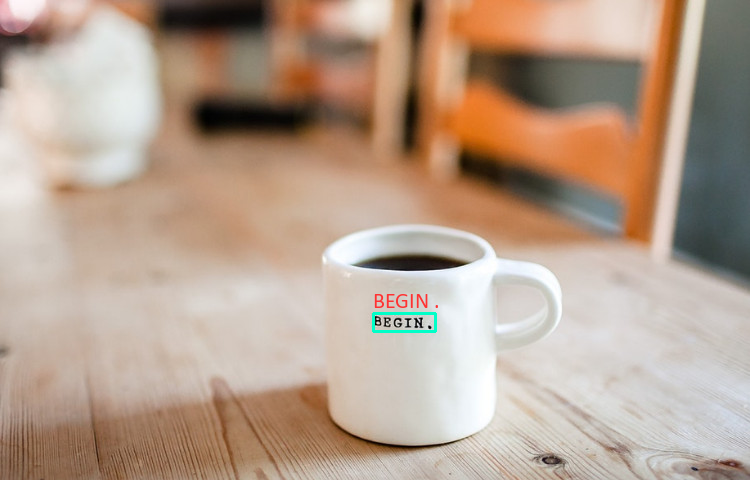

In [14]:
img = original.copy()
for (box, text, probability) in results:
  print(box, text, probability)
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

In [15]:
img = cv2.imread('/content/google-cloud.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[np.int32(908), np.int32(412)],
   [np.int32(1032), np.int32(412)],
   [np.int32(1032), np.int32(468)],
   [np.int32(908), np.int32(468)]],
  '1170',
  np.float64(0.7980766296386719)),
 ([[np.int32(566), np.int32(454)],
   [np.int32(845), np.int32(454)],
   [np.int32(845), np.int32(520)],
   [np.int32(566), np.int32(520)]],
  'Google Cloud',
  np.float64(0.9968605410955261))]

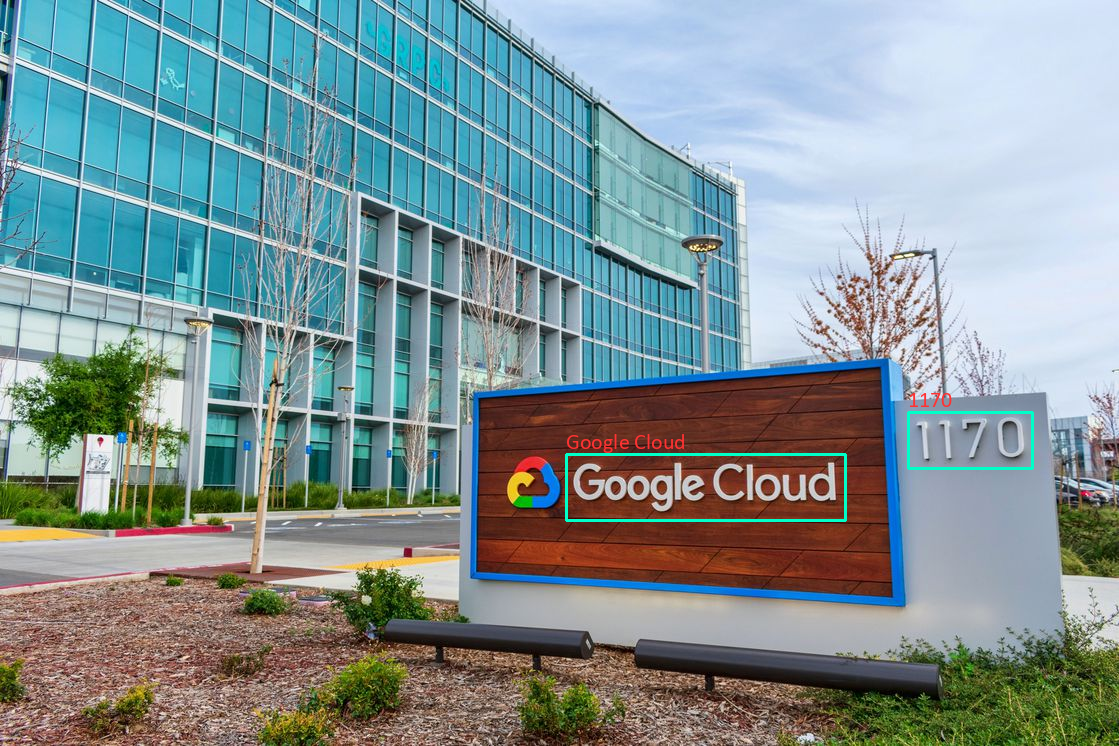

In [16]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

# Other languages

In [17]:
languages_list = ['en','fr']
languages_list

['en', 'fr']

In [18]:
img = cv2.imread('/content/french.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[np.int32(216), np.int32(122)],
   [np.int32(370), np.int32(122)],
   [np.int32(370), np.int32(170)],
   [np.int32(216), np.int32(170)]],
  'Mairie du /"',
  np.float64(0.787201777267268)),
 ([[np.int32(257), np.int32(222)],
   [np.int32(378), np.int32(222)],
   [np.int32(378), np.int32(272)],
   [np.int32(257), np.int32(272)]],
  '[Palais du',
  np.float64(0.9469954792727776)),
 ([[np.int32(242), np.int32(322)],
   [np.int32(515), np.int32(322)],
   [np.int32(515), np.int32(376)],
   [np.int32(242), np.int32(376)]],
  'LES ARTS DÉCORATIFS',
  np.float64(0.9791375508788465)),
 ([[np.int32(262), np.int32(440)],
   [np.int32(481), np.int32(440)],
   [np.int32(481), np.int32(492)],
   [np.int32(262), np.int32(492)]],
  'Musée du LOUVRE',
  np.float64(0.9962334628389892)),
 ([[np.int32(197), np.int32(537)],
   [np.int32(282), np.int32(537)],
   [np.int32(282), np.int32(577)],
   [np.int32(197), np.int32(577)]],
  'Théâtre',
  np.float64(0.9997367665416477)),
 ([[np.int32(195), np.int32(

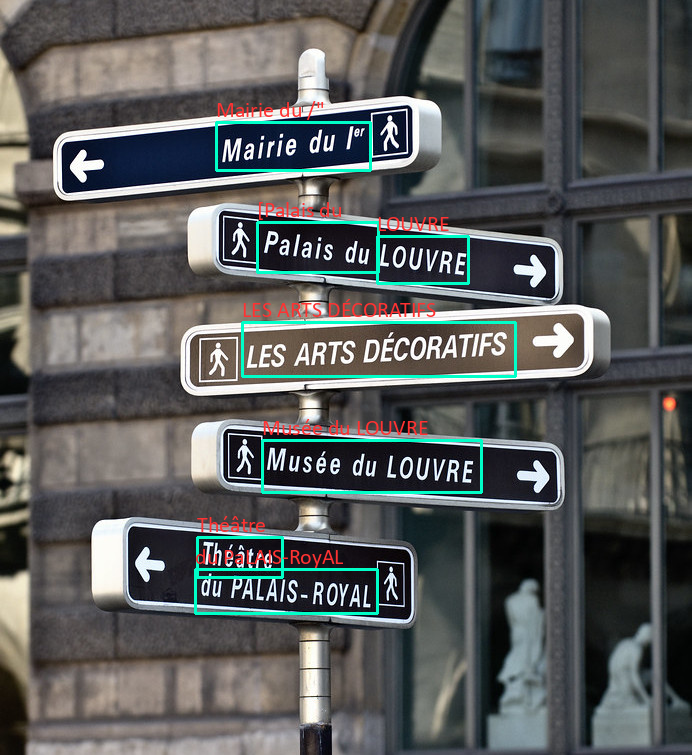

In [19]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
cv2_imshow(img)

# Text with background

In [25]:
def text_background(text, x, y, img, font, font_size=32, color=(200,255,0)):
  background = np.full((img.shape), (0,0,0), dtype=np.uint8)
  text_back = write_text(text, x, y, background, font, font_size=font_size)
  text_back = cv2.dilate(text_back, (np.ones((3,5), np.uint8)))
  fx, fy, fw, fh = cv2.boundingRect(text_back[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1)
  return img

In [33]:
font = '/content/calibri.ttf'
languages_list = ['en', 'pt']

In [34]:
img = cv2.imread('/content/plate-information.jpg')
reader = Reader(languages_list, gpu)
results = reader.readtext(img)
results

[([[np.int32(260), np.int32(164)],
   [np.int32(302), np.int32(164)],
   [np.int32(302), np.int32(196)],
   [np.int32(260), np.int32(196)]],
  '310',
  np.float64(0.9998522330811639)),
 ([[np.int32(344), np.int32(184)],
   [np.int32(368), np.int32(184)],
   [np.int32(368), np.int32(212)],
   [np.int32(344), np.int32(212)]],
  'i',
  np.float64(0.6906069168227447)),
 ([[np.int32(134), np.int32(262)],
   [np.int32(180), np.int32(262)],
   [np.int32(180), np.int32(290)],
   [np.int32(134), np.int32(290)]],
  'Cine',
  np.float64(0.9994775056838989)),
 ([[np.float64(304.07944680100655), np.float64(128.69533616120788)],
   [np.float64(366.51745895966945), np.float64(117.36831363725129)],
   [np.float64(369.92055319899345), np.float64(145.30466383879212)],
   [np.float64(307.48254104033055), np.float64(155.6316863627487)]],
  'União',
  np.float64(0.9999786218550137)),
 ([[np.float64(202.01488842937005), np.float64(155.701488842937)],
   [np.float64(304.70640266490693), np.float64(133.705633

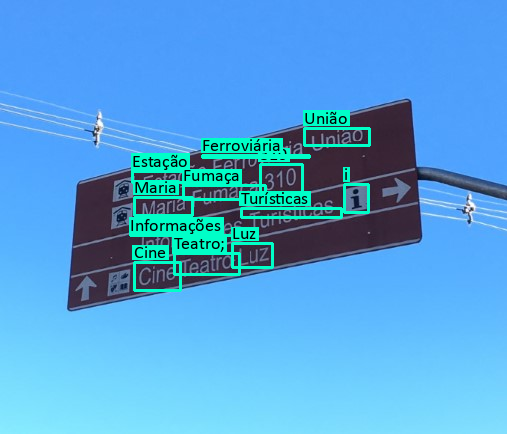

In [35]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br, (200,255,0))
  img = text_background(text, lt[0], lt[1], img, font, 18, (200,255,0))
  img = write_text(text, lt[0], lt[1], img, font, (0,0,0), 18)
cv2_imshow(img)